<a href="https://colab.research.google.com/github/HackerJacky/TimeSeriesColab/blob/main/TS_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###時間序列第三次作業
1. 使⽤yfinance套件下載S&P500(^gspc)，台灣0050ETF(0050.tw)，比特幣(btc-usd)，黃⾦近⽉期貨價格
(gc=f)，美債三個⽉到期殖利率(^IRX)的歷史價格資料，樣本期間設定2021-01-01到2025-04-22
2. 計算每個資產的序列報酬率（使⽤對數報酬率）的平均，標準差（波動率），偏態，前1%與後1%的分位數。
3. 對上述序列報酬率進⾏平穩性檢定(ADF test)。
4. 為每個資產分別估計AR(1),AR(2),AR(3),ARMA(1,1)模型並判斷哪個模型比較好。

In [ ]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
from scipy.stats import skew

In [ ]:
#1載入資料
sp500=yf.download('^gspc',start='2021-01-01',end='2025-04-22')
TW_0050=yf.download('0050.TW',start='2021-01-01',end='2025-04-22')
btc=yf.download('btc-usd',start='2021-01-01',end='2025-04-22')
gold=yf.download('gc=f',start='2021-01-01',end='2025-04-22')
bonds=yf.download('^IRX',start='2021-01-01',end='2025-04-22')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
#2
data_sp=sp500['Close']
data_tw=TW_0050['Close']
data_btc=btc['Close']
data_gold=gold['Close']
data_bonds=bonds['Close']
ret_sp=np.log(data_sp/data_sp.shift()).dropna()
ret_tw=np.log(data_tw/data_tw.shift()).dropna()
ret_btc=np.log(data_btc/data_btc.shift()).dropna()
ret_gold=np.log(data_gold/data_gold.shift()).dropna()
ret_bonds=np.log(data_bonds/data_bonds.shift()).dropna()
#平均數
print("S&P500",ret_sp.mean())
print("台灣0050ETF",ret_tw.mean())
print("比特幣",ret_btc.mean())
print("黃金",ret_gold.mean())
print("債券",ret_bonds.mean())

S&P500 Ticker
^GSPC    0.000308
dtype: float64
台灣0050ETF Ticker
0050.TW    0.000356
dtype: float64
比特幣 Ticker
BTC-USD    0.000695
dtype: float64
黃金 Ticker
GC=F    0.000519
dtype: float64
債券 Ticker
^IRX    0.003827
dtype: float64


In [ ]:
#2
##標準差(波動率)
print("S&P500",ret_sp.std())
print("台灣0050ETF",ret_tw.std())
print("比特幣",ret_btc.std())
print("黃金",ret_gold.std())
print("債券",ret_bonds.std())

S&P500 Ticker
^GSPC    0.011088
dtype: float64
台灣0050ETF Ticker
0050.TW    0.013712
dtype: float64
比特幣 Ticker
BTC-USD    0.032085
dtype: float64
黃金 Ticker
GC=F    0.009422
dtype: float64
債券 Ticker
^IRX    0.13235
dtype: float64


In [ ]:
#2
##偏態
print("S&P500",skew(ret_tw, bias=False))
print("台灣0050ETF",skew(ret_tw, bias=False))
print("比特幣",skew(ret_btc, bias=False))
print("黃金",skew(ret_gold, bias=False))
print("債券",skew(ret_bonds, bias=False))

[-0.46359797]
[0.01762788]
[-0.12952661]
[-0.35367128]
[0.65724945]


In [15]:
#前後1%分位數
print(f"{'S&P500':<10} 前1%分位數: {ret_sp.quantile(0.01).iloc[0]:>8.4f} 後1%分位數: {ret_sp.quantile(0.99).iloc[0]:>8.4f}")
print(f"{'台灣0050ETF':<10} 前1%分位數: {ret_tw.quantile(0.01).iloc[0]:>8.4f} 後1%分位數: {ret_tw.quantile(0.99).iloc[0]:>8.4f}")
print(f"{'比特幣':<10} 前1%分位數: {ret_btc.quantile(0.01).iloc[0]:>8.4f} 後1%分位數: {ret_btc.quantile(0.99).iloc[0]:>8.4f}")
print(f"{'黃金':<10} 前1%分位數: {ret_gold.quantile(0.01).iloc[0]:>8.4f} 後1%分位數: {ret_gold.quantile(0.99).iloc[0]:>8.4f}")
print(f"{'債券':<10} 前1%分位數: {ret_bonds.quantile(0.01).iloc[0]:>8.4f} 後1%分位數: {ret_bonds.quantile(0.99).iloc[0]:>8.4f}")



S&P500     前1%分位數:  -0.0309 後1%分位數:   0.0254
台灣0050ETF  前1%分位數:  -0.0371 後1%分位數:   0.0352
比特幣        前1%分位數:  -0.0910 後1%分位數:   0.0944
黃金         前1%分位數:  -0.0259 後1%分位數:   0.0234
債券         前1%分位數:  -0.5108 後1%分位數:   0.5031


In [16]:
#3 ADF test
res_SP = ts.adfuller(ret_sp,1)
res_TW = ts.adfuller(ret_tw,1)
res_BTC = ts.adfuller(ret_btc,1)
res_GOLD = ts.adfuller(ret_gold,1)
res_BONDS = ts.adfuller(ret_bonds,1)

In [17]:
#4
##S&P500
reg_sp_1=AutoReg(ret_sp,lags=1).fit() #AR(1)
print(reg_sp_1.summary())

#AR(1) AIC=-6635.494  BIC=-6620.549
#AR(2)  AIC= -6626.696 BIC=-6606.772
#AR(3)  AIC=-6623.415  BIC=-6598.514
#ARMA(1,1)  AIC= -6639.907 BIC=-6619.975

                            AutoReg Model Results                             
Dep. Variable:                  ^GSPC   No. Observations:                 1078
Model:                     AutoReg(1)   Log Likelihood                3320.747
Method:               Conditional MLE   S.D. of innovations              0.011
Date:                Sat, 26 Apr 2025   AIC                          -6635.494
Time:                        10:47:55   BIC                          -6620.549
Sample:                             1   HQIC                         -6629.834
                                 1078                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      0.912      0.362      -0.000       0.001
^GSPC.L1      -0.0189      0.031     -0.619      0.536      -0.079       0.041
                                    Roots           

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [18]:
reg_sp_2=AutoReg(ret_sp,lags=2).fit() #AR(2)
print(reg_sp_2.summary())

                            AutoReg Model Results                             
Dep. Variable:                  ^GSPC   No. Observations:                 1078
Model:                     AutoReg(2)   Log Likelihood                3317.348
Method:               Conditional MLE   S.D. of innovations              0.011
Date:                Sat, 26 Apr 2025   AIC                          -6626.696
Time:                        10:47:57   BIC                          -6606.772
Sample:                             2   HQIC                         -6619.150
                                 1078                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      0.906      0.365      -0.000       0.001
^GSPC.L1      -0.0194      0.031     -0.634      0.526      -0.079       0.040
^GSPC.L2      -0.0106      0.031     -0.346      0.7

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [19]:
reg_sp_3=AutoReg(ret_sp,lags=3).fit() #AR(3)
print(reg_sp_3.summary())

                            AutoReg Model Results                             
Dep. Variable:                  ^GSPC   No. Observations:                 1078
Model:                     AutoReg(3)   Log Likelihood                3316.707
Method:               Conditional MLE   S.D. of innovations              0.011
Date:                Sat, 26 Apr 2025   AIC                          -6623.415
Time:                        10:47:59   BIC                          -6598.514
Sample:                             3   HQIC                         -6613.984
                                 1078                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      0.935      0.350      -0.000       0.001
^GSPC.L1      -0.0209      0.030     -0.686      0.493      -0.081       0.039
^GSPC.L2      -0.0125      0.030     -0.410      0.6

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [20]:
arma_ret_sp = ARIMA(ret_sp, order=(1, 0, 1)).fit()
print(arma_ret_sp.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

                               SARIMAX Results                                
Dep. Variable:                  ^GSPC   No. Observations:                 1078
Model:                 ARIMA(1, 0, 1)   Log Likelihood                3323.953
Date:                Sat, 26 Apr 2025   AIC                          -6639.907
Time:                        10:48:01   BIC                          -6619.975
Sample:                             0   HQIC                         -6632.359
                               - 1078                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      0.906      0.365      -0.000       0.001
ar.L1               0      0.010          0      1.000      -0.019       0.019
ma.L1              -0      0.010         -0      1.0

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


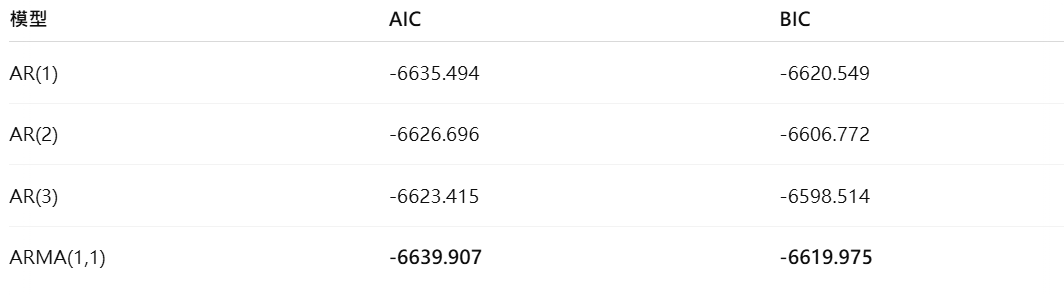

In [27]:
#4
##台灣0050
reg_tw_1=AutoReg(ret_tw,lags=1).fit()
print(reg_tw_1.summary())

                            AutoReg Model Results                             
Dep. Variable:                0050.TW   No. Observations:                 1037
Model:                     AutoReg(1)   Log Likelihood                2974.099
Method:               Conditional MLE   S.D. of innovations              0.014
Date:                Sat, 26 Apr 2025   AIC                          -5942.197
Time:                        10:51:53   BIC                          -5927.368
Sample:                             1   HQIC                         -5936.571
                                 1037                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      0.816      0.414      -0.000       0.001
0050.TW.L1     0.0190      0.031      0.612      0.540      -0.042       0.080
                                    Roots           

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [28]:
##台灣0050 AR(2)
reg_tw_2=AutoReg(ret_tw,lags=2).fit()
print(reg_tw_2.summary())

                            AutoReg Model Results                             
Dep. Variable:                0050.TW   No. Observations:                 1037
Model:                     AutoReg(2)   Log Likelihood                2972.305
Method:               Conditional MLE   S.D. of innovations              0.014
Date:                Sat, 26 Apr 2025   AIC                          -5936.611
Time:                        10:51:56   BIC                          -5916.842
Sample:                             2   HQIC                         -5929.110
                                 1037                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      0.835      0.403      -0.000       0.001
0050.TW.L1     0.0199      0.031      0.641      0.522      -0.041       0.081
0050.TW.L2    -0.0499      0.031     -1.607      0.1

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [29]:
reg_tw_3=AutoReg(ret_tw,lags=3).fit()
print(reg_tw_3.summary())

                            AutoReg Model Results                             
Dep. Variable:                0050.TW   No. Observations:                 1037
Model:                     AutoReg(3)   Log Likelihood                2971.179
Method:               Conditional MLE   S.D. of innovations              0.014
Date:                Sat, 26 Apr 2025   AIC                          -5932.358
Time:                        10:51:58   BIC                          -5907.652
Sample:                             3   HQIC                         -5922.984
                                 1037                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      0.823      0.410      -0.000       0.001
0050.TW.L1     0.0166      0.031      0.535      0.593      -0.044       0.077
0050.TW.L2    -0.0493      0.031     -1.588      0.1

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [30]:
##台灣0050  ARMA(1,1)
arma_ret_tw=ARIMA(ret_tw,order=(1,0,1)).fit()
print(arma_ret_tw.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                0050.TW   No. Observations:                 1037
Model:                 ARIMA(1, 0, 1)   Log Likelihood                2976.994
Date:                Sat, 26 Apr 2025   AIC                          -5945.988
Time:                        10:52:01   BIC                          -5926.211
Sample:                             0   HQIC                         -5938.485
                               - 1037                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      0.739      0.460      -0.001       0.001
ar.L1          0.4019      0.876      0.459      0.646      -1.315       2.119
ma.L1         -0.3853      0.885     -0.436      0.6

In [23]:
#4
##比特幣
reg_btc_1=AutoReg(ret_btc,lags=1).fit()
reg_btc_2=AutoReg(ret_btc,lags=2).fit()
reg_btc_3=AutoReg(ret_btc,lags=3).fit()
arma_ret_btc=ARIMA(ret_btc,order=(1,0,1)).fit()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

In [ ]:
#4
##黃金
reg_gold_1=AutoReg(ret_gold,lags=1).fit()
reg_gold_2=AutoReg(ret_gold,lags=2).fit()
reg_gold_3=AutoReg(ret_gold,lags=3).fit()
arma_ret_gold=ARIMA(ret_gold,order=(1,0,1)).fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [22]:
#4
##債券
reg_bonds_1=AutoReg(ret_bonds,lags=1).fit()
reg_bonds_2=AutoReg(ret_bonds,lags=2).fit()
reg_bonds_3=AutoReg(ret_bonds,lags=3).fit()
arma_ret_bonds=ARIMA(ret_bonds,order=(1,0,1)).fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
